In [4]:
import warnings 
warnings.filterwarnings("ignore")

# imports 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import env
from scipy import stats
from sklearn.model_selection import train_test_split


In [6]:
def get_connection(db, user=env.username, host=env.database, password=env.password):
    return f'mysql+pymysql://{user}:{password}@{host}/{db}'


query = "SELECT measurements.measurement_id, measurements.sepal_length,\
                measurements.sepal_width, measurements.petal_length, \
                measurements.petal_width, species.species_name, species.species_id \
            FROM measurements JOIN species ON(species.species_id=measurements.species_id)"

# function to get the data and run the query
def get_data():
    return pd.read_sql(query,get_connection('iris_db'))



In [7]:
df = get_data()

In [8]:
df.head()

,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_name,species_id
0,1,5.1,3.5,1.4,0.2,setosa,1
1,2,4.9,3.0,1.4,0.2,setosa,1
2,3,4.7,3.2,1.3,0.2,setosa,1
3,4,4.6,3.1,1.5,0.2,setosa,1
4,5,5.0,3.6,1.4,0.2,setosa,1


In [9]:
def prep_iris_inline(df):
    df = df.rename(columns={'species_name': 'species'})
    df = df.drop(columns=['measurement_id', 'species_id'])
    return df

In [10]:
df = prep_iris_inline(df)


In [11]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [12]:
# 80/20 train test split
train, test = train_test_split(df, train_size=0.8, random_state=1349, stratify=df.species)
# 70/30 train validate split
train, validate = train_test_split(train, train_size=0.7, random_state=1349, stratify=train.species)

In [13]:
train.shape, validate.shape, test.shape

((84, 5), (36, 5), (30, 5))

In [14]:
train.head()

,sepal_length,sepal_width,petal_length,petal_width,species
138,6.0,3.0,4.8,1.8,virginica
7,5.0,3.4,1.5,0.2,setosa
79,5.7,2.6,3.5,1.0,versicolor
74,6.4,2.9,4.3,1.3,versicolor
97,6.2,2.9,4.3,1.3,versicolor


In [15]:
train.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,84.000000,84.000000,84.000000,84.000000
mean,5.847619,3.053571,3.738095,1.208333
std,0.841324,0.417233,1.765459,0.775717
min,4.300000,2.000000,1.000000,0.100000
25%,5.075000,2.800000,1.600000,0.375000
50%,5.900000,3.000000,4.300000,1.300000
75%,6.425000,3.300000,5.100000,1.800000
max,7.700000,4.400000,6.900000,2.500000


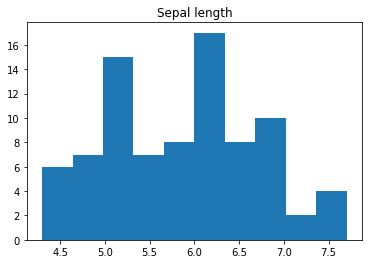

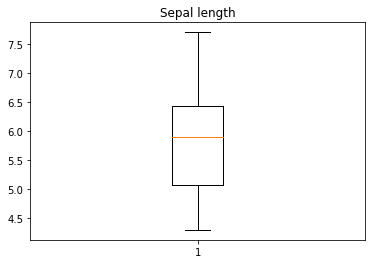

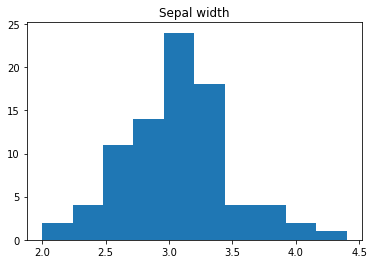

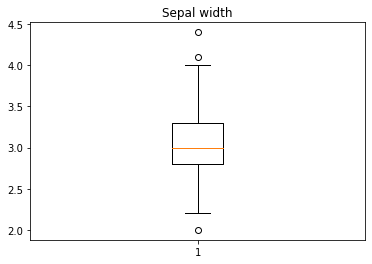

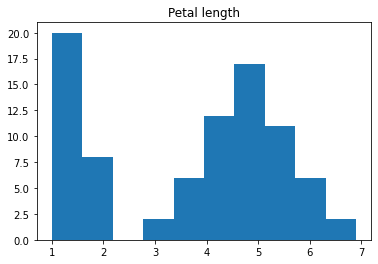

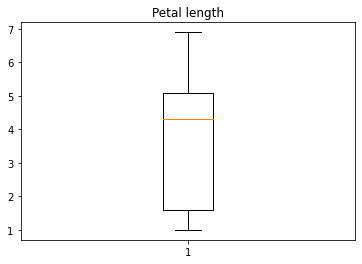

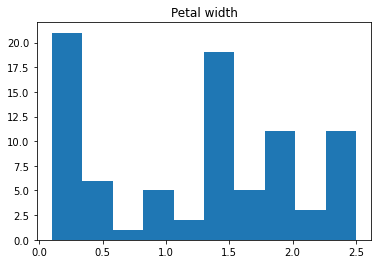

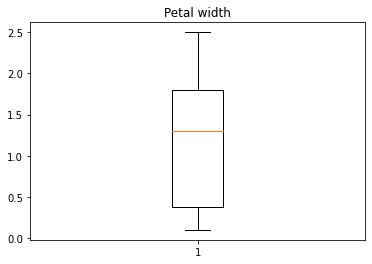

In [16]:
# Plot numeric columns
# define num_cols here:
# num_cols could be defined by datatype of float64, or just anything that isn't an object
# every thing in train.columns where the train[col] series is not an object
num_cols = train.columns[[train[col].dtype != 'object' for col in train.columns]]
for col in num_cols:
    #use matplotlib to create a histogram
    #alt formatting: calling train[col].hist()
    plt.hist(train[col])
    # make a title, cleaned up a little with string methods
    plt.title(col.replace('_',' ').capitalize())
    #call plt.show so we have separate visualizations
    plt.show()
    # use matplotlib to create a boxplot
    plt.boxplot(train[col])
    # use the same string methods to clean up the title
    plt.title(col.replace('_',' ').capitalize())
    plt.savefig(col + 'box.png')
    plt.show()

In [17]:
# Do the same process for our target, a categorical dependent variable
train.species.value_counts()

virginica     28
setosa        28
versicolor    28
Name: species, dtype: int64

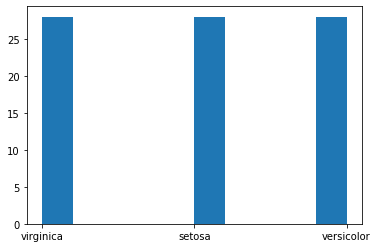

In [18]:
plt.hist(train.species)
plt.show()

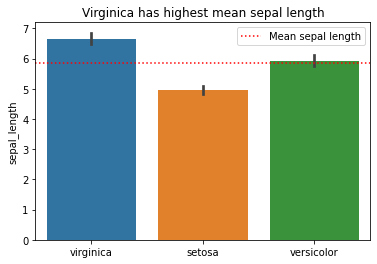

In [19]:
# we retroactively place our takeaway from this visualization as the title
plt.title("Virginica has highest mean sepal length")
# calling seaborn for a bar plot, specifying species and sepal length
sns.barplot(x="species", y="sepal_length", data=train)
# annotate a mean of the sepal length
# calculating a mean of the sepal length (for *all* the species)
mean_sepal_length = train.sepal_length.mean()
# place the calculated mean as a horizontal axis line
plt.axhline(mean_sepal_length, label="Mean sepal length", color='red', linestyle='dotted')
plt.xlabel('')
plt.legend()
plt.show()

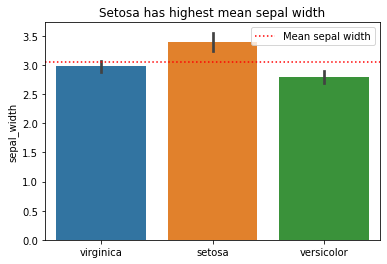

In [20]:
plt.title("Setosa has highest mean sepal width")
sns.barplot(x="species", y="sepal_width", data=train)
mean_sepal_width = train.sepal_width.mean()
plt.axhline(mean_sepal_width, label="Mean sepal width", color='red', linestyle='dotted')
plt.xlabel('')
plt.legend()
plt.show()

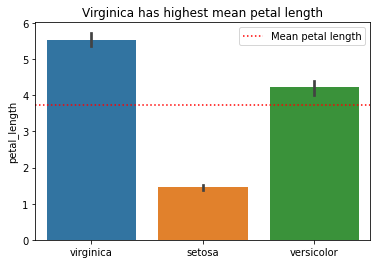

In [21]:
plt.title("Virginica has highest mean petal length")
sns.barplot(x="species", y="petal_length", data=train)
mean_petal_length = train.petal_length.mean()
plt.axhline(mean_petal_length, label="Mean petal length", color='red', linestyle='dotted')
plt.xlabel('')
plt.legend()
plt.show()

In [22]:
# Virginica descriptive statistics
# train, where train.species is virginica
train[train.species == 'virginica'].describe()

,sepal_length,sepal_width,petal_length,petal_width
count,28.000000,28.000000,28.000000,28.000000
mean,6.650000,2.975000,5.539286,2.046429
std,0.532986,0.260519,0.525173,0.294998
min,5.800000,2.200000,4.800000,1.500000
25%,6.300000,2.800000,5.100000,1.800000
50%,6.600000,3.000000,5.550000,2.050000
75%,6.900000,3.200000,5.825000,2.300000
max,7.700000,3.400000,6.900000,2.500000


In [23]:
train[train.species == 'setosa'].describe()

,sepal_length,sepal_width,petal_length,petal_width
count,28.000000,28.000000,28.000000,28.000000
mean,4.957143,3.385714,1.457143,0.246429
std,0.362531,0.433516,0.185450,0.129048
min,4.300000,2.300000,1.000000,0.100000
25%,4.775000,3.100000,1.400000,0.200000
50%,5.000000,3.350000,1.500000,0.200000
75%,5.100000,3.625000,1.600000,0.325000
max,5.800000,4.400000,1.900000,0.600000


In [24]:
train[train.species == 'versicolor'].describe()

,sepal_length,sepal_width,petal_length,petal_width
count,28.000000,28.000000,28.000000,28.000000
mean,5.935714,2.800000,4.217857,1.332143
std,0.512231,0.303071,0.522142,0.205577
min,5.000000,2.000000,3.000000,1.000000
25%,5.600000,2.700000,3.900000,1.275000
50%,6.000000,2.900000,4.300000,1.300000
75%,6.300000,3.000000,4.600000,1.500000
max,6.900000,3.400000,5.100000,1.700000


In [25]:
# establish variables that represent the species subset of train
# virginica = train, where train's species is virginica
virginica = train[train.species == 'virginica']
# again, for versicolor
versicolor = train[train.species == 'versicolor']\
# again, for setosa
setosa = train[train.species == 'setosa']
# establish a one-tailed test using a kwarg in mannwhitney
t, p = stats.mannwhitneyu(virginica.petal_width, versicolor.petal_width, 
                          alternative="greater")
t, p

(768.5, 2.982389808696449e-10)

In [26]:
test_var = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
for var in test_var:
    t, p = t, p = stats.mannwhitneyu(virginica[var], versicolor[var], alternative="greater")
    print(f'Comparing {var} between virginica and versicolor')
    print(t, p)
    print('------------------')
    print('\n')

Comparing sepal_length between virginica and versicolor
652.0 1.0119920315840621e-05
------------------


Comparing sepal_width between virginica and versicolor
534.0 0.009508012794926874
------------------


Comparing petal_length between virginica and versicolor
771.5 2.5253450566492905e-10
------------------


Comparing petal_width between virginica and versicolor
768.5 2.982389808696449e-10
------------------




In [27]:
train['sepal_area'] = train.sepal_length * train.sepal_width
train['petal_area'] = train['petal_length'] * train['petal_width']

In [28]:
import itertools

In [29]:
list(itertools.combinations(train.drop(columns='species').columns, 2))

[('sepal_length', 'sepal_width'),
 ('sepal_length', 'petal_length'),
 ('sepal_length', 'petal_width'),
 ('sepal_length', 'sepal_area'),
 ('sepal_length', 'petal_area'),
 ('sepal_width', 'petal_length'),
 ('sepal_width', 'petal_width'),
 ('sepal_width', 'sepal_area'),
 ('sepal_width', 'petal_area'),
 ('petal_length', 'petal_width'),
 ('petal_length', 'sepal_area'),
 ('petal_length', 'petal_area'),
 ('petal_width', 'sepal_area'),
 ('petal_width', 'petal_area'),
 ('sepal_area', 'petal_area')]

In [30]:
combos = [
    ('sepal_length', 'sepal_width'),
    ('petal_length', 'petal_width'),
    ('sepal_area', 'petal_area'),
    ('sepal_length', 'petal_length')
]

In [31]:
combos[0]

('sepal_length', 'sepal_width')

In [32]:
train.groupby('species')['sepal_area'].sum()


species
setosa        473.12
versicolor    467.81
virginica     554.13
Name: sepal_area, dtype: float64

In [33]:
x = combos[0][0]
y = combos[0][1]
def scatter_species(x, y):
    for species, subset in train.groupby('species'):
        plt.scatter(subset[x], subset[y], label=species)
        plt.xlabel(x)
        plt.ylabel(y)
        plt.legend()

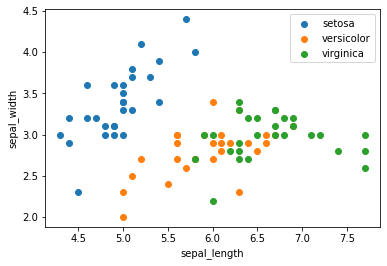

In [34]:
scatter_species(x,y)

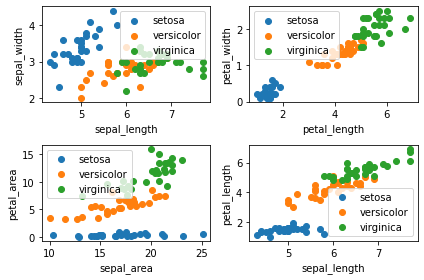

In [35]:
plt.subplot(2,2,1)
scatter_species(combos[0][0], combos[0][1])
plt.subplot(2,2,2)
scatter_species(combos[1][0], combos[1][1])
plt.subplot(2,2,3)
scatter_species(combos[2][0], combos[2][1])
plt.subplot(2,2,4)
scatter_species(combos[3][0], combos[3][1])
plt.tight_layout()

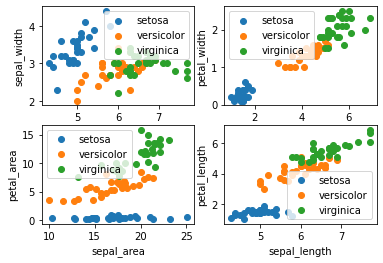

In [36]:
for i, pair in enumerate(combos):
    plt.subplot(2,2,i+1)
    scatter_species(pair[0], pair[1])

In [37]:
train.corr()

,sepal_length,sepal_width,petal_length,petal_width,sepal_area,petal_area
sepal_length,1.000000,-0.166612,0.900357,0.860775,0.685879,0.885277
sepal_width,-0.166612,1.000000,-0.415310,-0.323396,0.599240,-0.272634
petal_length,0.900357,-0.415310,1.000000,0.965383,0.429428,0.958520
petal_width,0.860775,-0.323396,0.965383,1.000000,0.473277,0.980366
sepal_area,0.685879,0.599240,0.429428,0.473277,1.000000,0.526012
petal_area,0.885277,-0.272634,0.958520,0.980366,0.526012,1.000000


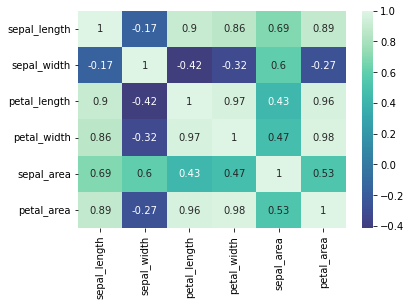

In [38]:
sns.heatmap(train.corr(), cmap='mako', center=0, annot=True)
plt.show()

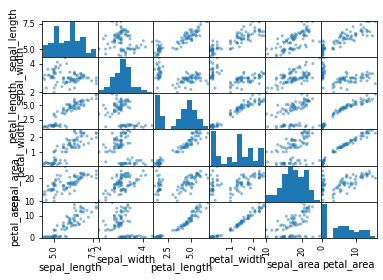

In [39]:
pd.plotting.scatter_matrix(train)
plt.show()

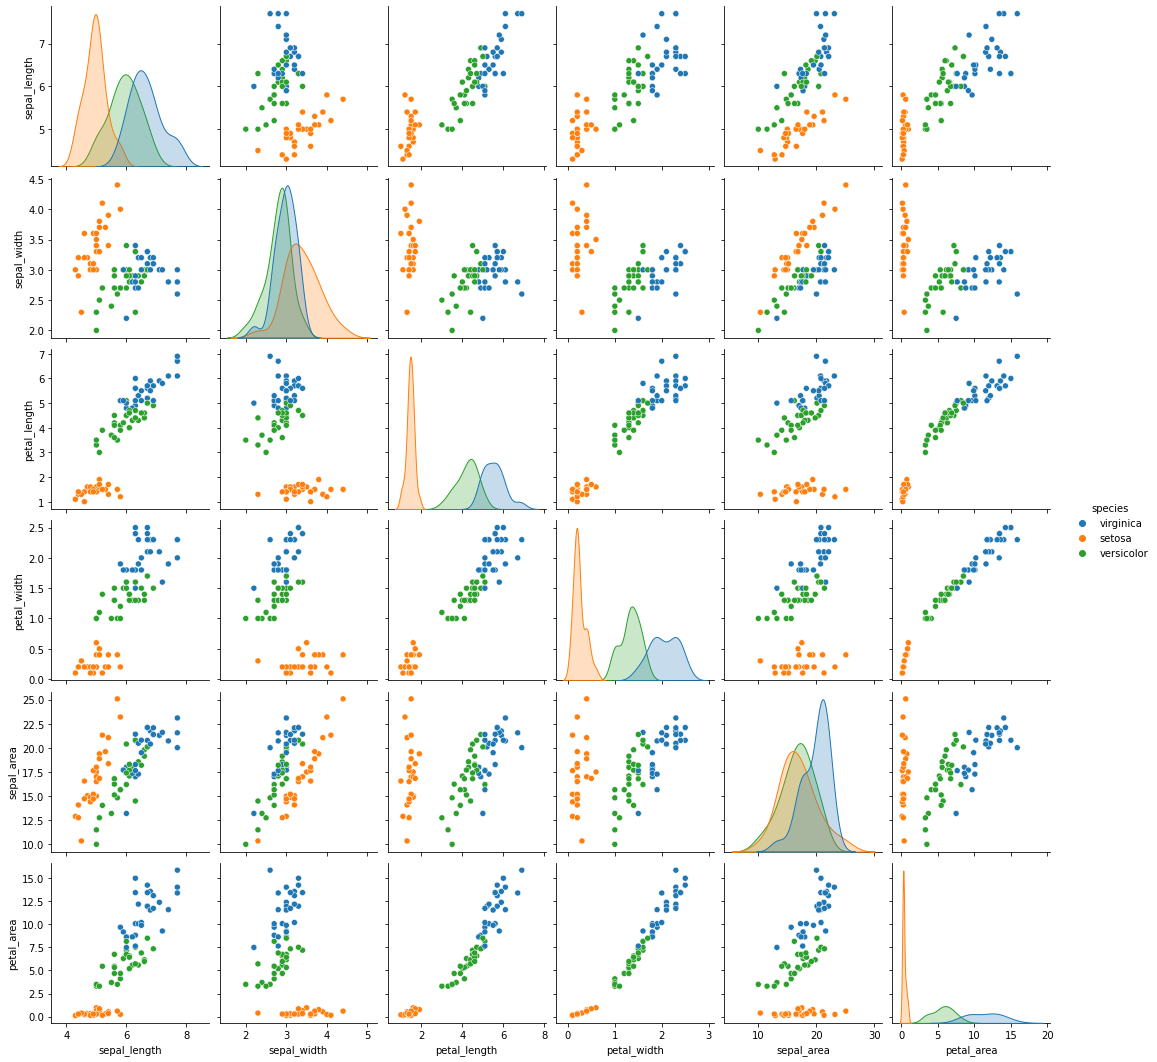

In [40]:
sns.pairplot(train, hue='species')
plt.show()

In [41]:
virginica = train[train['species'] == 'virginica']
versicolor = train[train['species'] == 'versicolor']

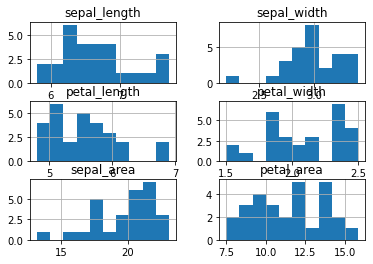

In [42]:
virginica.hist()
plt.show()


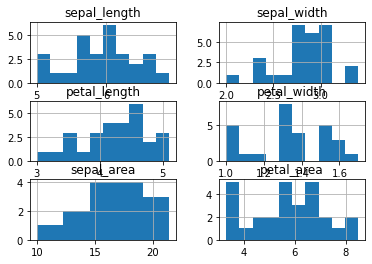

In [43]:
versicolor.hist()
plt.show()

In [44]:
virginica.describe()['sepal_length']['std']

0.532985998009398

In [45]:
versicolor.describe()['sepal_length']

count    28.000000
mean      5.935714
std       0.512231
min       5.000000
25%       5.600000
50%       6.000000
75%       6.300000
max       6.900000
Name: sepal_length, dtype: float64

In [46]:
import scipy.stats as stats

In [47]:
tstat, p = stats.ttest_ind(virginica.sepal_length,
                versicolor.sepal_length, 
                equal_var=False
               )

               

In [48]:
tstat

5.11297615624047

In [49]:
p

4.304267066877367e-06

In [50]:
stats.mannwhitneyu(virginica.sepal_width, 
                   versicolor.sepal_width
                  )

MannwhitneyuResult(statistic=534.0, pvalue=0.019016025589853748)

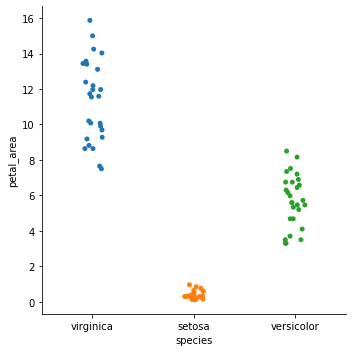

In [51]:
sns.catplot(data=train, x='species', y='petal_area', kind='strip')

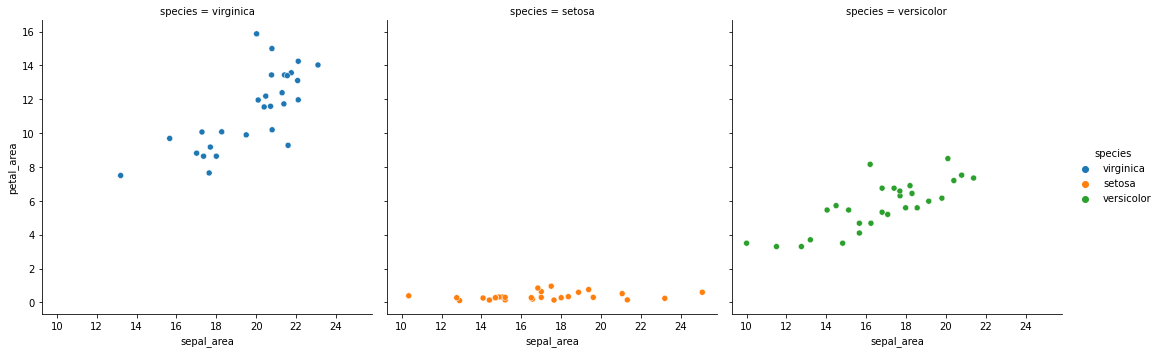

In [52]:
sns.relplot(data=train, x='sepal_area', y='petal_area', kind='scatter', hue='species', col='species')